## Тема “Элементы теории вероятностей”

**1.**<br>
Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [65]:
import random
import seaborn as sns
def spin_roulette():
    return (random.randint(0, 32))
def calc_combination(n, k):
    return math.factorial(n) / (math.factorial(n - k) * math.factorial(k))
def bernoulli(n, k, p):
    q = 1 - p
    return calc_combination(n, k) * (p**k) * (q**(n-k))

**2.** <br>
Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [183]:
import math

# теормема сложения:
# из 10 спинов выпадет 5 или 6 четных чисел
# Pn(k) = Сnk pk qn-k

n = 100; k=1
even_count = len(np.arange(0, 33, 2))
odd_count = len(np.arange(0, 33)) - len(np.arange(0, 33, 2))
pk = even_count/32

bernoulli(10, 5, pk) + bernoulli(10, 6, pk)

0.4692423477281604

In [184]:
n = 1000

def monteCarlo(n):
    k = 0
    x = [0]*n
    for i in range(10):
        a = [0 if spin_roulette() % 2 != 0 else 1 for _ in range(n)]
        x = [x+a for x, a in zip(a, x)] 
    for i in x:
        if i == 5 or i == 6:
            k += 1
    return k/n
probas = [monteCarlo(n) for _ in range(n)]
np.array(probas).mean()

0.462298

**3.**<br>Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9. 

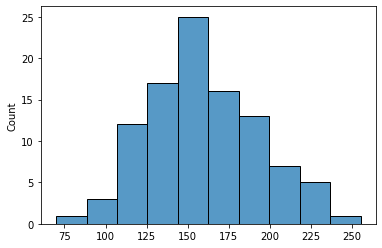

In [77]:
import numpy as np
g = []
for i in range(100):
    g.append([spin_roulette(0, 32) for _ in range(10)])
sums = [sum(i) for i in g]
sns.histplot(sums);

**3.**<br>
Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.
Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [121]:
n = 100
p=0.5
def toss_coin(samples, start, end, n, success_count):
    k=0
    x = None
    for i in range(samples):
        a = np.random.randint(start, end, n)
        if x is None: x = a; continue
        x = [x+a for x, a in zip(a, x)]        
    for i in range(0, n):
        if x[i] == success_count:
            k = k + 1
    return k/n
v=bernoulli(4, 2, 0.5)
print(f'Рассчетная вероятность по {n} испытаниям по формуле Бернулли:', v)
probas = [toss_coin(4, 0, 2, n, 2) for _ in range(n)]
print(f'Среднее арифметическое по {n} испытаниям {n} испытаний', np.array(probas).mean())

Рассчетная вероятность по 100 испытаниям по формуле Бернулли: 0.375
Среднее арифметическое по 100 испытаниям 100 испытаний 0.37129999999999996


In [123]:
# веротяность, что 4 раза из 4х выпадет орел в серии из n испытаний
n=1000
v = bernoulli(4, 4, 0.5)
print(f'Рассчетная вероятность по {n} испытаниям по формуле Бернулли:', v)
probas = [toss_coin(4, 0, 2, n, 4) for _ in range(n)]
print(f'Среднее арифметическое по {n} испытаниям {n} испытаний', np.array(probas).mean())

Рассчетная вероятность по 1000 испытаниям по формуле Бернулли: 0.0625
Среднее арифметическое по 1000 испытаниям 1000 испытаний 0.062712


In [113]:
# веротяность, что орел ни разу не выпадет 
n = 10000
v = bernoulli(4, 4, 0.5)
print(f'Рассчетная вероятность по {n} испытаниям по формуле Бернулли:', v)
probas = [toss_coin(4, 0, 2, n, 0) for _ in range(n)]
print(f'Среднее арифметическое по {n} испытаниям {n} испытаний', np.array(probas).mean())

Рассчетная вероятность по 10000 испытаниям по формуле Бернулли: 0.0625
Среднее арифметическое по 10000 испытаниям 10000 испытаний 0.06254008


**4.**<br> (не обязательно, но желательно) Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [196]:
import itertools
for p in itertools.permutations("вжух"):
    print(''.join(p), end=' ')  

вжух вжху вужх вухж вхжу вхуж жвух жвху жувх жухв жхву жхув увжх увхж ужвх ужхв ухвж ухжв хвжу хвуж хжву хжув хувж хужв 

In [201]:
for p in itertools.combinations("вжух", 3):
    print(''.join(p), end=' ')

вжу вжх вух жух 